In [1]:
import nidaqmx
import time
import matplotlib.pyplot as plt

In [57]:
duration = 10  # seconds
sample_rate = 200000  # Hz
num_samples = int(duration * sample_rate)

with nidaqmx.Task() as task:
    task.ai_channels.add_ai_voltage_chan("Dev1/ai0")
    task.ai_channels.add_ai_voltage_chan("Dev1/ai1")

    task.timing.cfg_samp_clk_timing(rate=sample_rate, sample_mode=nidaqmx.constants.AcquisitionType.FINITE,
                                     samps_per_chan=num_samples)

    print("Acquiring data...")
    task.wait_until_done(timeout=2)
    data = task.read(number_of_samples_per_channel=num_samples)

# data is a 2D list: [channel0_samples, channel1_samples]
I1 = data[0]
I2 = data[1]

Acquiring data...


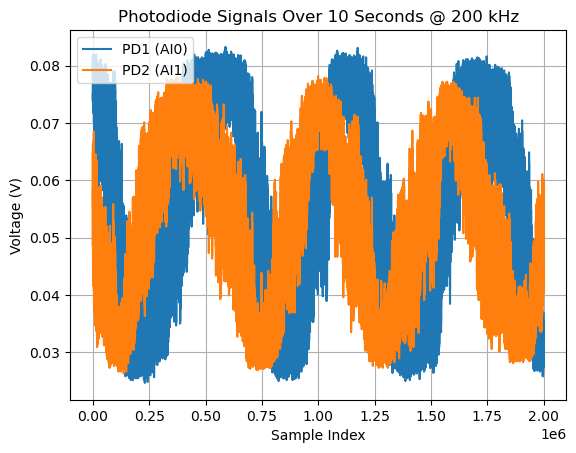

In [59]:
plt.plot(I1, label="PD1 (AI0)")
plt.plot(I2, label="PD2 (AI1)")
plt.xlabel("Sample Index")
plt.ylabel("Voltage (V)")
plt.legend()
plt.grid(True)
plt.title("Photodiode Signals Over 10 Seconds @ 200 kHz")
plt.show()

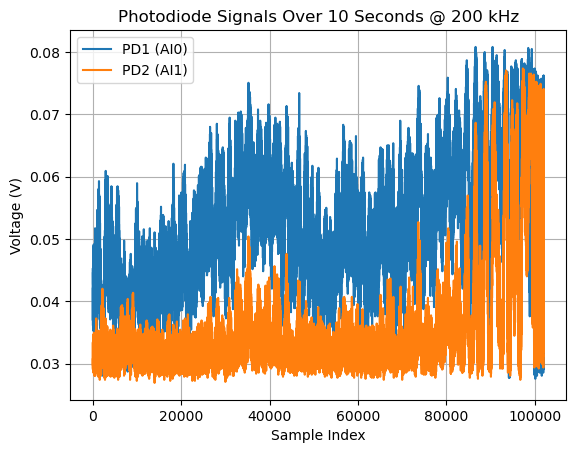

In [59]:
plt.plot(I1[750000:852000], label="PD1 (AI0)")
plt.plot(I2[750000:852000], label="PD2 (AI1)")
plt.xlabel("Sample Index")
plt.ylabel("Voltage (V)")
plt.legend()
plt.grid(True)
plt.title("Photodiode Signals Over 10 Seconds @ 200 kHz")
plt.show()

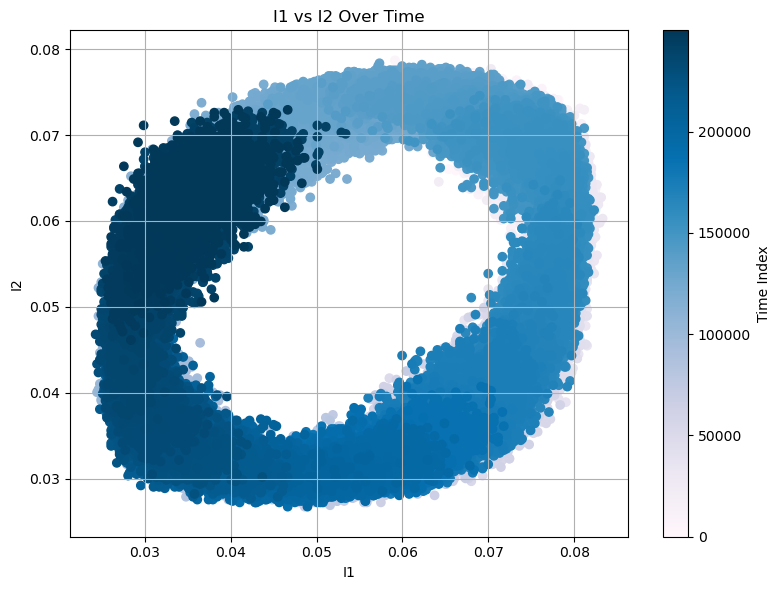

In [41]:
#SCATTER PLOT
import numpy as np
t = np.arange(len(I1[1000000:1250000]))

plt.figure(figsize=(8, 6))
sc = plt.scatter(I1[1000000:1250000], I2[1000000:1250000], c=t, cmap='PuBu')  # Use colormap to encode time
plt.xlabel("I1")
plt.ylabel("I2")
plt.title("I1 vs I2 Over Time")
plt.colorbar(sc, label="Time Index")
plt.grid(True)
plt.axis('equal')  # Ensures equal scaling on both axes
plt.tight_layout()
plt.show()

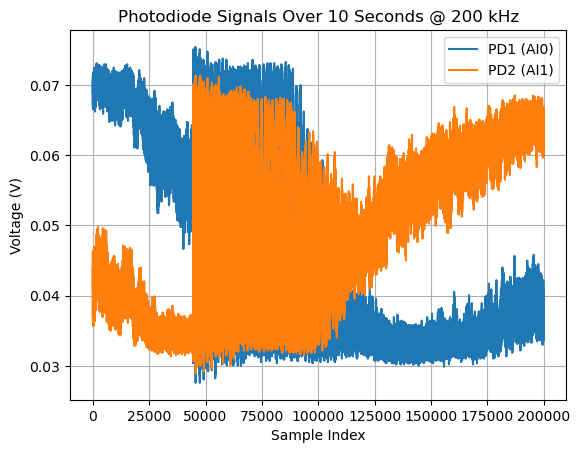

In [19]:
plt.plot(I1[100000:300000], label="PD1 (AI0)")
plt.plot(I2[100000:300000], label="PD2 (AI1)")
plt.xlabel("Sample Index")
plt.ylabel("Voltage (V)")
plt.legend()
plt.grid(True)
plt.title("Photodiode Signals Over 10 Seconds @ 200 kHz")
plt.show()

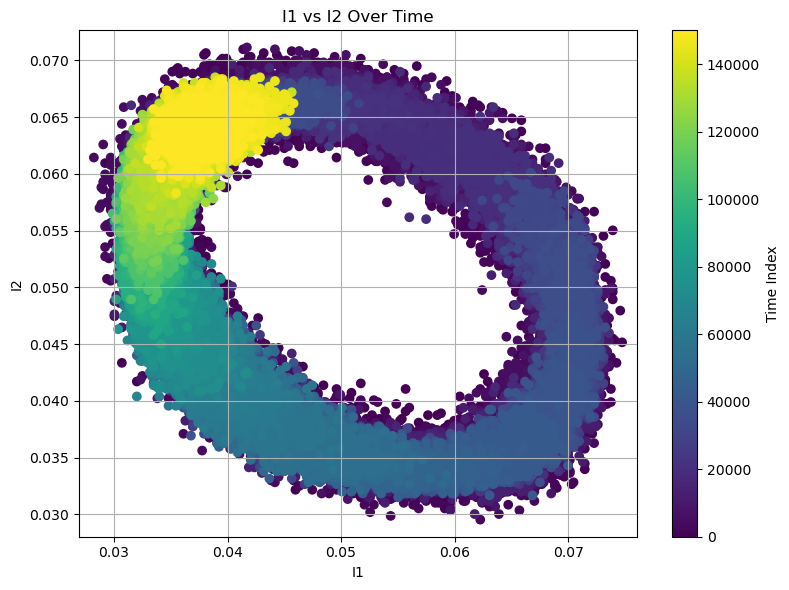

In [21]:
#SCATTER PLOT
I1_segment = np.concatenate((I1[150000:160000], I1[161000:300000]))

t = np.arange(len(I1[150000:300000]))

plt.figure(figsize=(8, 6))
sc = plt.scatter(I1[150000:300000], I2[150000:300000], c=t, cmap='viridis')  # Use colormap to encode time
plt.xlabel("I1")
plt.ylabel("I2")
plt.title("I1 vs I2 Over Time")
plt.colorbar(sc, label="Time Index")
plt.grid(True)
plt.axis('equal')  # Ensures equal scaling on both axes
plt.tight_layout()
plt.show()

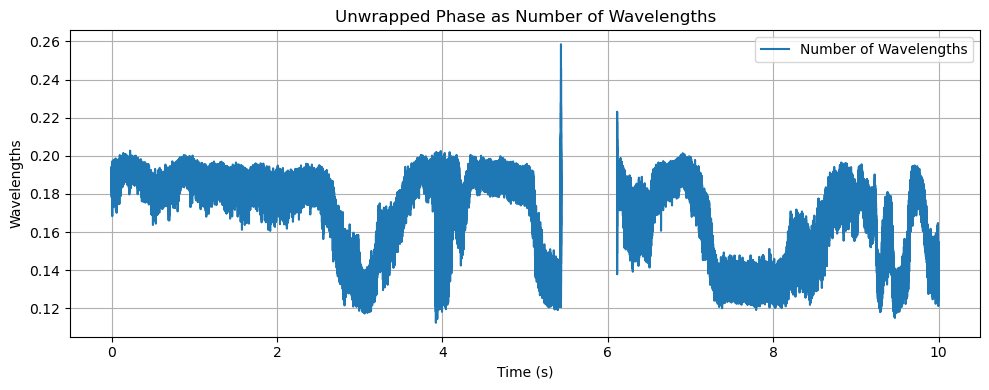

In [115]:
# IDENTIFY HOW MANY WAVELENGTHS YOU MOVED (OPD)

import numpy as np
import matplotlib.pyplot as plt

# === INPUT DATA ===
# I1 and I2: Arrays from photodiodes
# Replace with your own data
I1_ = I1
I2_ = I2

I1_ = np.array(I1_)
I2_ = np.array(I2_)

# === PARAMETERS ===
sampling_rate = 200_000  # Hz
dt = 1 / sampling_rate    # seconds per sample
time = np.arange(len(I1_)) * dt

# === 1. Compute amplitude (signal strength) ===
amplitude = np.sqrt(I1_**2 + I2_**2)

# === 2. Define threshold and valid signal mask ===
threshold = 0.05 * np.max(amplitude)  # 5% of max amplitude
valid = amplitude > threshold         # Boolean mask of good data

# === 3. Compute phase only where valid ===
phase = np.full_like(I1_, np.nan, dtype=np.float64)
phase[valid] = np.arctan2(I2_[valid], I1_[valid])

# === 4. Unwrap valid phase only ===
phase_unwrapped = np.unwrap(phase[valid])

# === 5. Reconstruct full-length array (NaNs where invalid) ===
phase_full = np.full_like(I1_, np.nan, dtype=np.float64)
phase_full[valid] = phase_unwrapped

# === 6. Optional: Convert to OPL if wavelength known ===
lambda_nm = 635  # change if needed
lambda_m = lambda_nm * 1e-9
num_wavelengths = phase_full / (2 * np.pi)  # Unitless count of wavelengths

# === 7. Plotting ===
plt.figure(figsize=(10, 4))
plt.plot(time, num_wavelengths, label="Number of Wavelengths")
plt.xlabel("Time (s)")
plt.ylabel("Wavelengths")
plt.title("Unwrapped Phase as Number of Wavelengths")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [61]:
# TO SAVE DATA
import numpy as np
# Stack arrays column-wise if they're the same length
data = np.column_stack((I1, I2))

# Save to CSV
np.savetxt("reg.csv", data, delimiter=",", header="I1,I2", comments='')
# From centered to -0.03/-0.15